<a href="https://colab.research.google.com/github/sagargahalod/My-work/blob/main/RCA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Mounting your Google Drive ...")
 
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Rootcause/"


Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
#library imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_columns', 140)
pd.set_option('precision', 3)

In [ ]:
# Creating a dataframe from the defect file
#df = pd.read_csv(path+"Final.csv",engine='python',sep='\s+|,|\t')
df = pd.read_csv(path+"Final.csv")
df.tail(100)

,COIL,MT_FROM,MT_TO,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
118095,426213,0,1408,0,0,1,0,0,1,959,41.551,1303.108,1327.592,1285.990,1338.721,1338.725,1326.944,823.001,1013.014,1133.888,1283.490,728.649,994.156,1231.234,1294.254,1297.031,1297.906,1297.028,1294.767,859.349,1.290,1.408,1.574,1.288,1.262,1.261,1258.049,1486.193,3716.712,3955.171,4090.804,4180.565,1901.579,2018.529,1138.716,1164.128,1306.694,1331.609,126.416,124.907,323.088,320.314,310.128,310.328,179.824,179.474,107.813,107.556,123.693,123.289,-11.202,1.398,1710.185,-2.717,-3.375,-3.883,-3.375,-2.995,-3.375,25.550,49.950,19.232,19.114,23.735,47.328,44.085,1012.330,841.898,728.368,619.300,448.470,280.233,68.881,59.972,71.971,280.468,280.425,279.807,280.596,281.250,259.727,46.165,12.499,56.608,114.975,15.075,2719.054,69.217,121.838,39.375,19.800,45.337,65.138,561.981,530.093,529.971,530.105,20.250,20.038,3551.065,40.925,959.293,3466.983,0.540,0.135,0.162
118096,426213,0,1408,0,0,1,0,0,1,966,41.547,1303.204,1327.650,1286.231,1338.724,1338.990,1327.245,822.896,1013.483,1133.931,1283.507,728.434,994.308,1231.256,1294.301,1297.118,1297.882,1296.969,1294.562,859.428,1.290,1.411,1.576,1.297,1.261,1.274,1262.364,1487.796,3722.302,3965.161,4090.631,4184.078,1915.483,2035.554,1140.434,1166.485,1308.071,1331.235,126.659,125.198,323.003,320.060,309.792,309.976,179.979,179.661,108.087,107.848,122.481,122.034,-11.319,1.483,1710.912,-2.977,-3.375,-3.517,-3.375,-2.772,-3.375,25.368,49.923,19.123,18.611,23.459,47.200,43.944,1013.103,843.943,729.759,619.900,448.505,279.759,69.390,59.854,71.766,280.056,280.254,278.966,278.578,281.151,262.989,46.165,12.499,56.636,114.975,15.075,2726.168,69.192,121.838,39.375,19.800,45.337,65.138,562.025,530.148,530.209,530.760,20.250,19.977,3550.129,40.925,960.440,3470.539,0.540,0.135,0.162
118097,426213,0,1408,0,0,1,0,0,1,973,41.548,1303.309,1327.676,1286.599,1338.934,1339.331,1327.507,823.266,1013.106,1133.765,1283.394,729.009,993.978,1231.178,1294.301,1297.065,1297.672,1296.741,1294.029,859.440,1.278,1.403,1.570,1.263,1.269,1.278,1246.307,1468.310,3705.161,3935.534,4076.430,4169.351,1854.854,1973.665,1147.119,1172.120,1310.434,1331.786,126.157,124.628,322.910,320.110,309.991,310.058,179.144,178.649,107.956,107.761,122.223,121.827,-11.342,1.180,1710.291,-3.471,-3.375,-2.954,-3.375,-2.686,-3.375,24.935,50.292,19.123,17.990,23.254,47.078,43.806,1013.013,846.041,732.112,621.621,449.017,279.880,68.892,59.970,71.888,280.220,280.635,278.786,277.018,280.693,273.738,46.165,12.499,56.660,114.975,15.075,2756.766,69.176,121.838,39.375,19.800,45.337,65.138,561.916,530.184,529.804,529.247,20.238,19.994,3550.698,40.921,961.194,3456.489,0.539,0.135,0.162
118098,426213,0,1408,0,0,1,0,0,1,980,41.556,1303.264,1327.740,1286.801,1338.964,1339.658,1327.582,823.067,1013.258,1132.841,1282.650,728.851,993.530,1230.439,1293.529,1

In [ ]:
print(df.COIL.unique().shape)
df.isnull().sum().sum()

(519,)


0

In [ ]:
df0 = df.copy()

In [ ]:
col_list = ['DIF_TIPO_1','DIF_TIPO_2','DIF_TIPO_3','DIF_TIPO_4','DIF_TIPO_5','DIF_TIPO_6']
counts = []
for col in col_list:
  counts.append((col, df[col].sum()))
df_stats = pd.DataFrame(counts, columns=['def_cat', 'num_of_def'])
df_stats


,def_cat,num_of_def
0,DIF_TIPO_1,10171
1,DIF_TIPO_2,14820
2,DIF_TIPO_3,92525
3,DIF_TIPO_4,58299
4,DIF_TIPO_5,10293
5,DIF_TIPO_6,8145


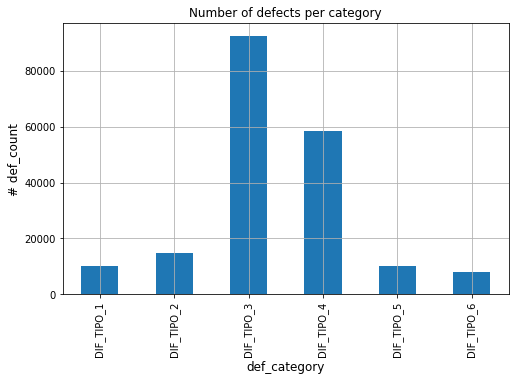

In [ ]:
df_stats.plot(x='def_cat', y='num_of_def', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of defects per category")
plt.ylabel('# def_count', fontsize=12)
plt.xlabel('def_category', fontsize=12);

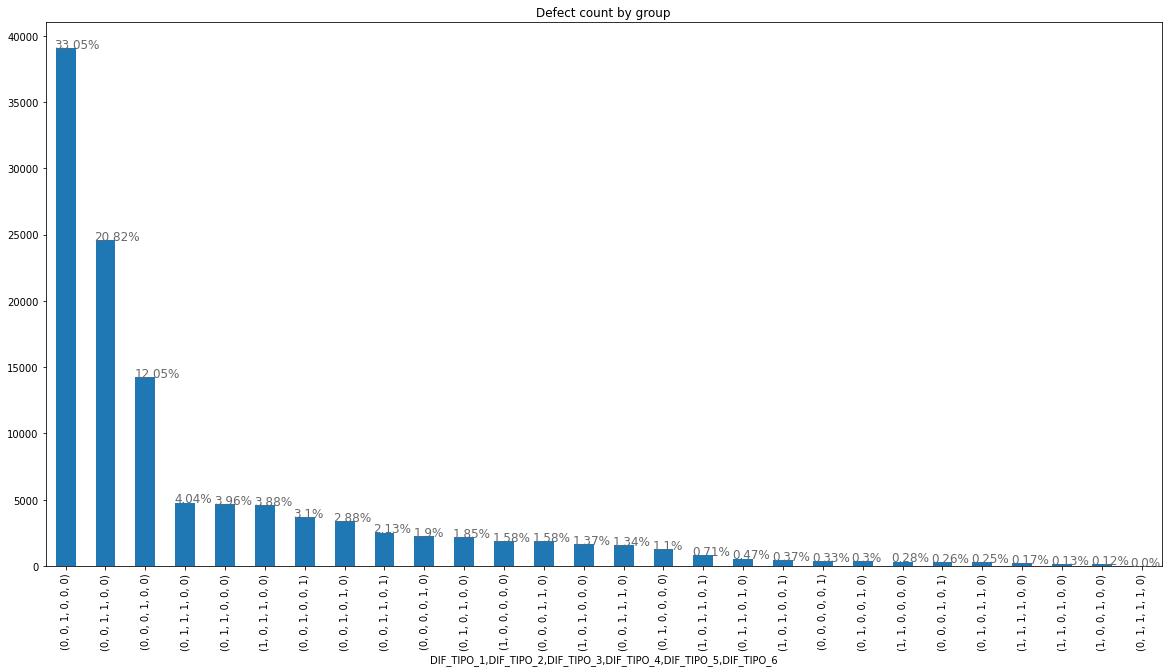

In [ ]:
result = df[col_list]
# Change this line to plot percentages instead of absolute values
plt.title('Defect count by group')
ax = result.value_counts().plot(kind='bar',figsize=(20,10))
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='dimgrey')

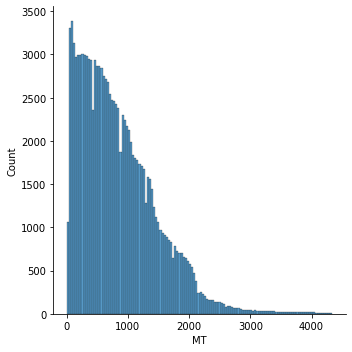

In [ ]:
sns.displot(df['MT'])

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

In [ ]:
filename = "/content/drive/My Drive/Rootcause/Final.csv"
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=116,
)

Shape of your Data Set: (118195, 116)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  103
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  3
    116 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 5356


In [ ]:
Features = df.drop(columns=col_list,axis=1)
Target = df[col_list]

In [ ]:
pd.set_option('max_rows',85)

In [ ]:

corr_matrix = Features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

dx = { 'Cols': upper.index.values , 'MaxVal' : upper.max().values, 
     'Partner' :upper.idxmax().values }

Hcor = pd.DataFrame(dx,columns=['Cols','MaxVal','Partner'])
Hcor= Hcor.dropna()
#Hcor.Partner = Hcor.Partner.astype(int)
Hcor.loc[ (Hcor['MaxVal'] > 0.5) &(Hcor['MaxVal'] < 0.999) ]

,Cols,MaxVal,Partner
4,SPEED_PROCESS,0.717,MT_TO
6,TEMP_Z2,0.990,TEMP_Z1
7,TEMP_Z3,0.990,TEMP_Z2
8,TEMP_Z4,0.979,TEMP_Z2
9,TEMP_Z5,0.986,TEMP_Z4
10,TEMP_Z6,0.961,TEMP_Z3
11,PYRO_1_PRECHMBR,0.775,TEMP_Z1
13,PYRO_3_LST_3_ZONE,0.693,TEMP_Z6
14,LS_OVEN,0.875,TEMP_Z6
17,LASER_FRN_3,0.966,LS_OVEN


In [ ]:
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.cluster import KMeans as KM

In [ ]:
distortion = []
silhouette = []
for i in range(2, 11):
    km = KM(n_clusters=i, init='k-means++', random_state=42)
    km.fit(Features)
    y_kmi = km.predict(Features)
    distortion.append(km.inertia_)
    S = silhouette_score(Features, y_kmi, metric='euclidean')
    silhouette.append(S)

In [ ]:
fig, ax1 = plt.subplots(figsize = (8,5))
ax2 = ax1.twinx()

ax1.plot(range(2,11), distortion, color = '#25EA93', linestyle='dashed', marker = 'o')
ax2.plot(range(2,11), silhouette, color = '#DEC512', marker = 'o')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Distortion - inertia', color = '#25EA93')
ax2.set_ylabel('Silhouette index', color = '#DEC512' )

ax1.grid(b=None, axis = 'y')
plt.show()

In [ ]:
!pip install h2o

     |████████████████████████████████| 164.8MB 54kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.2-py2.py3-none-any.whl size=164848811 sha256=c4426ebdfa5b387d774d238209d6a82c58c0522899e41fe1d96be618fc67e06b
  Stored in directory: /root/.cache/pip/wheels/37/b6/c7/c1cfdcd471d476b2b5129f4d27a0fd89043858ee74eda7ee7a
Successfully built h2o


In [ ]:
import h2o
h2o.init( strict_version_check = False )
from h2o.estimators.gbm import H2OGradientBoostingEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp22xrb4g0
  JVM stdout: /tmp/tmp22xrb4g0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp22xrb4g0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,"7 days, 17 hours and 35 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_6oawgx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.cluster import KMeans as KM

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving solar_wind.csv to solar_wind.csv


In [ ]:
df = pd.read_csv('solar_wind.csv', header=0)

In [ ]:
y = df[['class']]

In [ ]:
X = df.drop('class', axis = 1)

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 mins 50 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,"7 days, 17 hours and 57 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_6oawgx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.import_file("solar_wind.csv", destination_frame="solar_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
train, valid, test = df.split_frame(ratios=[0.7,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

H2OResponseError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

gbm = H2OGradientBoostingEstimator()
gbm.train(x=X, y=y, training_frame=X_train)

H2OTypeError: ignored

In [ ]:
predictors = df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

H2OValueError: ignored